In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode

In [3]:
df = pd.read_csv('games.csv')

Поиск и суммирование пустых значений в каждой колонке

In [5]:
print(df.isnull().sum())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


Удаление строк с пустыми значениями

In [7]:
df_cleaned = df.dropna()

Проверка, остались ли пустые значения в столбцах

In [9]:
print(df_cleaned.isnull().sum())

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


Построим график распределения количества выпущенных игр по годам

In [11]:
games_per_year = df_cleaned.Year.value_counts().sort_index()

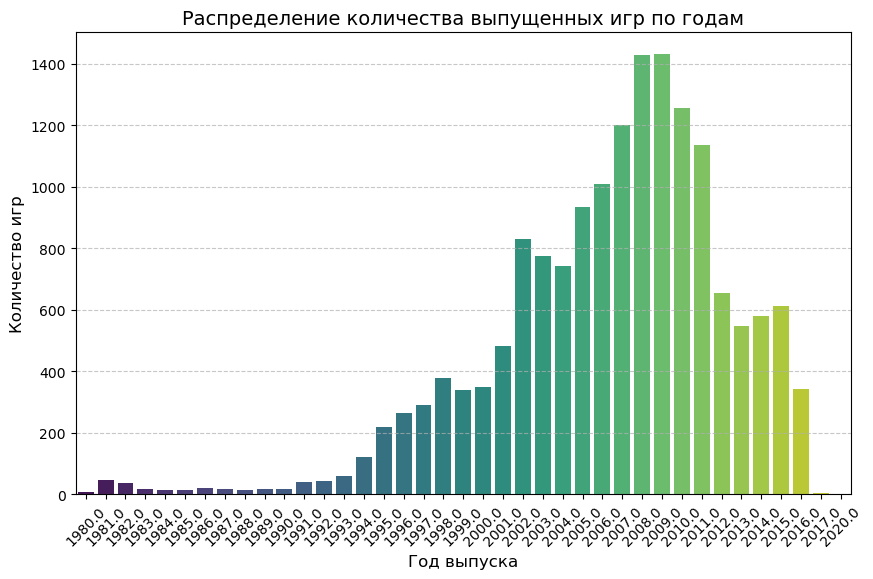

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x=games_per_year.index, y=games_per_year.values, palette='viridis')
plt.title("Распределение количества выпущенных игр по годам", fontsize=14)
plt.xlabel("Год выпуска", fontsize=12)
plt.ylabel("Количество игр", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Выведем описательные характеристики переменной Year

In [41]:
#Среднее
mean = df.Year.mean()

# Медиана
median = df.Year.median()

# Мода
mode_value, mode_count = mode(df.Year)

# Дисперсия
variance = df.Year.var()

# Стандартное отклонение
std_dev = df.Year.std()

# Максимум
maximum = df.Year.max()

# Минимум
minimum = df.Year.min()

# Квантили
quantiles = df.Year.quantile([0.25, 0.5, 0.75])

In [55]:
# Вывод результатов
print("Описательные характеристики переменной Year:")
print(f"Среднее: {mean:.0f}")
print(f"Медиана: {median:.0f}")
print(f"Мода: {mode_value:.0f} (встречается {mode_count:.0f} раз)")
print(f"Дисперсия: {variance:.2f}")
print(f"Стандартное отклонение: {std_dev:.2f}")
print(f"Максимум: {maximum:.0f}")
print(f"Минимум: {minimum:.0f}")
print("Квантили:")
print(quantiles)

Описательные характеристики переменной Year:
Среднее: 2006
Медиана: 2007
Мода: 2009 (встречается 1431 раз)
Дисперсия: 33.98
Стандартное отклонение: 5.83
Максимум: 2020
Минимум: 1980
Квантили:
0.25    2003.0
0.50    2007.0
0.75    2010.0
Name: Year, dtype: float64


На каких платформах произошло больше всего релизов?

In [73]:
games_per_platform = df_cleaned.Platform.value_counts().idxmax()
games_per_platform

'DS'

Игры каких издателей (Publisher) встречаются в датасете чаще всего?

In [82]:
games_per_publisher = df_cleaned.Publisher.value_counts().idxmax()
games_per_publisher

'Electronic Arts'

В каком регионе медианное значение объема продаж игр Nintendo является наибольшим?

In [97]:
nintendo_games = df_cleaned[df_cleaned.Publisher == 'Nintendo']
median_sales = {
    'NA': nintendo_games.NA_Sales.median(),
    'EU': nintendo_games.EU_Sales.median(),
    'JP': nintendo_games.JP_Sales.median(),
    'Other': nintendo_games.Other_Sales.median()
}
max_region = max(median_sales, key=median_sales.get)
max_value = median_sales[max_region]

In [100]:
print(f"Регион с наибольшим медианным объемом продаж игр Nintendo: {max_region} ({max_value} млн копий)")

Регион с наибольшим медианным объемом продаж игр Nintendo: NA (0.375 млн копий)


Изучим объем продаж игр Nintendo в Японии с разбивкой жанрам.

In [105]:
sales_by_genre = nintendo_games.groupby('Genre').JP_Sales.sum()
print("Объем продаж игр Nintendo в Японии по жанрам:")
print(sales_by_genre)

Объем продаж игр Nintendo в Японии по жанрам:
Genre
Action           29.16
Adventure         9.01
Fighting         14.94
Misc             55.25
Platform        102.36
Puzzle           37.09
Racing           29.22
Role-Playing    101.95
Shooter           6.03
Simulation       23.65
Sports           35.87
Strategy         10.46
Name: JP_Sales, dtype: float64


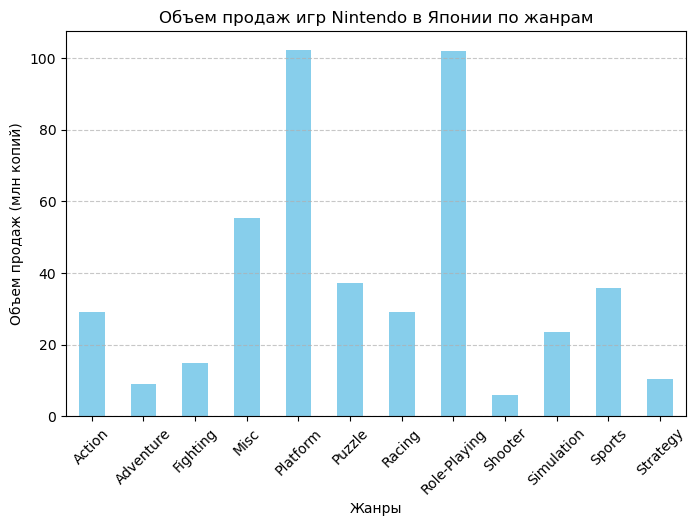

In [107]:
sales_by_genre.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title('Объем продаж игр Nintendo в Японии по жанрам')
plt.xlabel('Жанры')
plt.ylabel('Объем продаж (млн копий)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

 Посмотрим на медиану, среднее, межквартильный размах

In [115]:
#Медиана
genre_median = sales_by_genre.median()

#Cреднее
genre_mean = sales_by_genre.mean()

#Межквартильный размах
genre_Q1 = sales_by_genre.quantile(0.25)
genre_Q3 = sales_by_genre.quantile(0.75)
genre_IQR = genre_Q3 - genre_Q1

# Вывод результатов
print("Статистики продаж игр Nintendo в Японии по жанрам:")
print(f"Медиана: {genre_median:.3f}")
print(f"Среднее: {genre_mean:.3f}")
print(f"Межквартильный размах: {genre_IQR:.3f}")

Статистики продаж игр Nintendo в Японии по жанрам:
Медиана: 29.190
Среднее: 37.916
Межквартильный размах: 27.810


Визуализируем динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports.

In [139]:
# Указанные жанры
genres_of_interest = ['Fighting', 'Simulation', 'Platform', 'Racing', 'Sports']

# Фильтрация по платформе Nintendo и жанрам
nintendo_games = df_cleaned[(df_cleaned.Publisher == 'Nintendo') & (df_cleaned.Genre.isin(genres_of_interest))]

# Группировка по годам и жанрам с суммированием продаж
sales_by_year_genre = nintendo_games.groupby(['Year', 'Genre']).Global_Sales.sum().unstack()
sales_by_year_genre = sales_by_year_genre.fillna(0)
sales_by_year_genre

Genre,Fighting,Platform,Racing,Simulation,Sports
Year,,,,,
1983.0,0.00,5.62,0.00,0.00,3.20
1984.0,0.00,0.00,5.68,0.00,6.18
1985.0,0.00,43.17,0.00,0.00,1.96
1986.0,0.00,4.41,1.96,0.00,0.00
1987.0,5.42,0.00,0.00,0.00,2.15
1988.0,0.00,26.30,2.14,0.00,2.42
1989.0,0.00,18.14,0.00,0.00,5.72
1990.0,0.00,20.61,6.26,1.14,1.48
1991.0,0.00,0.56,1.14,1.98,1.38


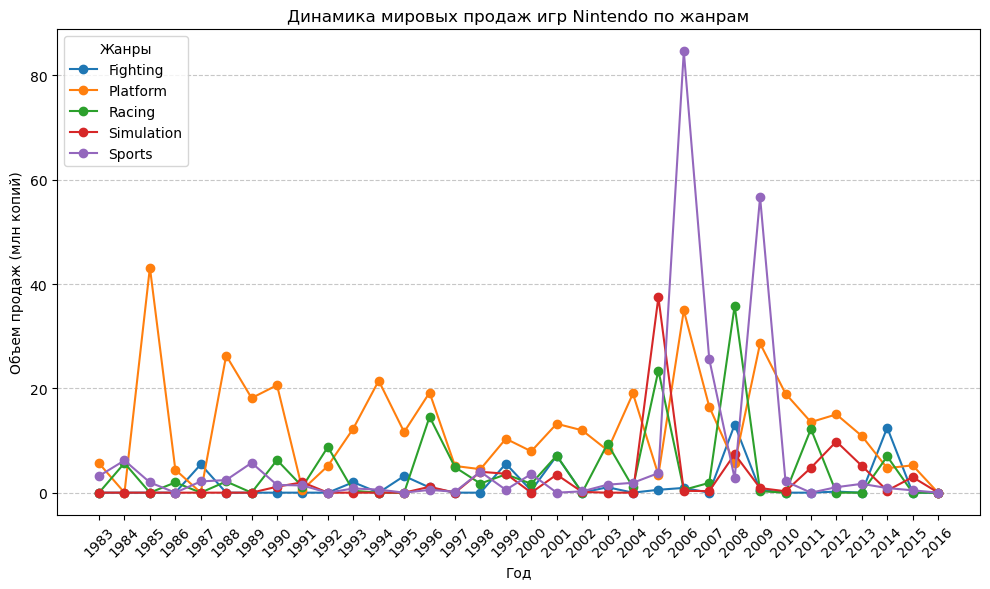

In [141]:
# Построение графика
plt.figure(figsize=(10, 6))
sales_by_year_genre.plot(ax=plt.gca(), marker='o')
plt.title('Динамика мировых продаж игр Nintendo по жанрам')
plt.xlabel('Год')
plt.ylabel('Объем продаж (млн копий)')
plt.xticks(sales_by_year_genre.index, rotation=45)
plt.legend(title='Жанры', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

В какие моменты времени было продано больше всего игр жанра Sports?

In [143]:
# Фильтрация данных по жанру Sports
sports_sales = nintendo_games[nintendo_games.Genre == 'Sports']

# Группировка по годам и суммирование продаж
sports_sales_by_year = sports_sales.groupby('Year').Global_Sales.sum()

# Находим год(ы) с максимальными продажами
max_sales = sports_sales_by_year.max()
best_years = sports_sales_by_year[sports_sales_by_year == max_sales]

print("Годы с максимальными продажами для жанра Sports:")
print(best_years)

Годы с максимальными продажами для жанра Sports:
Year
2006.0    84.62
Name: Global_Sales, dtype: float64
